# Методы решения СЛАУ


## Цели работы
Реализовать различные методы решения СЛАУ и провести их исследование

## Реализация методов решения СЛАУ


In [14]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.lib.function_base import vectorize

### Метод Гаусса с выбором ведущего элемента

Метод Гаусса с выбором ведущего элемента – это модификация метода Гаусса, которая позволяет избежать возможных ошибок при вычислении системы линейных уравнений.

Основная идея метода заключается в том, чтобы на каждом шаге выбирать в качестве ведущего элемента наибольший по модулю элемент в столбце текущей строки. Это позволяет избежать деления на очень маленькие или нулевые элементы, которые могут возникнуть при обычном методе Гаусса.

Алгоритм метода Гаусса с выбором ведущего элемента:

1. Приводим систему уравнений к треугольному виду, используя элементарные преобразования строк.
2. На каждом шаге выбираем ведущий элемент – наибольший по модулю элемент в столбце текущей строки.
3. Если ведущий элемент находится не на диагонали, меняем местами текущую строку с той строкой, в которой находится ведущий элемент.
4. Делим текущую строку на ведущий элемент, чтобы получить единицу на диагонали.
5. Вычитаем текущую строку, умноженную на коэффициент, из всех строк ниже текущей, чтобы получить нули под диагональю.
6. Повторяем шаги 2-5 для следующей строки, начиная с шага 2.

In [15]:
def gauss_method(matrix_A, vector):
    n = len(vector)

    # Для каждого столбца по очереди
    for i in range(n):
        # Нахождение максимального элемента в столбце
        max_el = abs(matrix_A[i][i])
        max_row = i
        for k in range(i + 1, n):
            if abs(matrix_A[k][i]) > max_el:
                max_el = abs(matrix_A[k][i])
                max_row = k

        # Перемещение максимального элемента на диагональ матрицы
        for k in range(i, n):
            tmp = matrix_A[max_row][k]
            matrix_A[max_row][k] = matrix_A[i][k]
            matrix_A[i][k] = tmp

        tmp = vector[max_row]
        vector[max_row] = vector[i]
        vector[i] = tmp

        # Приведение к треугольному виду
        for k in range(i + 1, n):
            c = -matrix_A[k][i] / matrix_A[i][i]
            for j in range(i, n):
                if i == j:
                    matrix_A[k][j] = 0
                else:
                    matrix_A[k][j] += c * matrix_A[i][j]
            vector[k] += c * vector[i]

    # Нахождение решения обратным ходом
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = vector[i]
        for j in range(i + 1, n):
            x[i] -= matrix_A[i][j] * x[j]
        x[i] /= matrix_A[i][i]

    return x

### Алгоритм LU-разложения с использованием разреженно-строчного формата хранения матрицы

Метод LU-разложения - это метод решения системы линейных уравнений, который заключается в представлении матрицы системы в виде произведения двух матриц: нижнетреугольной (L) и верхнетреугольной (U).
Для матрицы A размера n x n метод LU-разложения заключается в следующем:
1. Находим нижнетреугольную матрицу L и верхнетреугольную матрицу U такие, что A = LU.
2. Решаем систему Ly = b методом прямой подстановки, где y - вектор неизвестных.
3. Решаем систему Ux = y методом обратной подстановки, где x - искомый вектор.

In [16]:
def LU_method(A, b):
    # Для удобства объединим обе матрицы L и U в одну матрицу
    # Можем так сделать тк никакие числа кроме диагонали не пересекаются, а востановить диагональ L легко(Проставить единицы)
    lu_matrix = np.matrix(np.zeros([A.shape[0], A.shape[1]]))
    n = A.shape[0]

    for k in range(n):
        # вычисляем значения для U
        for j in range(k, n):
            lu_matrix[k, j] = A[k, j] - lu_matrix[k, :k] * lu_matrix[:k, j]
        # вычисляем значения для L
        for i in range(k + 1, n):
            lu_matrix[i, k] = (A[i, k] - lu_matrix[i, : k] * lu_matrix[: k, k]) / lu_matrix[k, k]

    # Прямой ход для нахождения У
    y = np.matrix(np.zeros([lu_matrix.shape[0], 1]))
    for i in range(y.shape[0]):
        y[i, 0] = b[i] - lu_matrix[i, :i] * y[:i]

    # обратный ход для нахождения X
    x = np.matrix(np.zeros([lu_matrix.shape[0], 1]))
    for i in range(1, x.shape[0] + 1):
        x[-i, 0] = (y[-i] - lu_matrix[-i, -i:] * x[-i:, 0]) / lu_matrix[-i, -i]

    return np.ravel(x)

методы для получения матриц по отдельности:

In [17]:
def get_L(m):
    L = m.copy()
    for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1 :] = 0
    return np.matrix(L)


def get_U(m):
    U = m.copy()
    for i in range(1, U.shape[0]):
        U[i, :i] = 0
    return U

### Метод Якоби

Метод Якоби - это итерационный метод решения систем линейных уравнений. Он заключается в последовательном приближении решения системы путем замены каждого элемента на значение, вычисленное из остальных элементов на предыдущей итерации.

Алгоритм метода Якоби следующий:

1. Записать систему линейных уравнений в виде Ax = b, где A - матрица коэффициентов, x - вектор неизвестных, b - вектор правых частей.

2. Разделить матрицу A на диагональную и остальные элементы: A = D + R, где D - диагональная матрица, а R - матрица, состоящая из остальных элементов.

3. Начальное приближение x0 задается произвольно.

4. Вычислить новое приближение x1 по формуле: x1 = D^(-1) * (b - Rx0), где D^(-1) - обратная диагональная матрица.

5. Повторять шаг 4 до тех пор, пока не будет достигнута заданная точность или не будет превышено максимальное число итераций.

6. Полученный вектор x является решением системы.

Метод Якоби сходится к решению системы, если матрица A является диагонально доминирующей или симметричной и положительно определенной. Однако он может быть медленным в сходимости и неэффективным для больших систем.

In [18]:
def jacobi_method(A, b, N=25, x=None):
    if x is None:
        x = np.zeros(len(A[0]))
                                                                                                                                                                    
    D = np.diag(A)
    R = A - np.diagflat(D)
                                                                                                                                                                         
    for i in range(N):
        x = (b - R.dot(x)) / D
    return x

## Проведение исследований

### Генераторы

In [19]:
def generate_matrix(k, n):
    A = np.zeros((n, n))
    # Для недиагональных
    for i in range(n):
        for j in range(n):
            if i != j:
                A[i, j] = np.random.choice([-1, -2, -3, -4])

    # Для диагональных
    for i in range(n):
        if i == 0:
            A[i, i] = -np.sum(A[i, 0:]) + 10 ** (-k)
        else:
            A[i, i] = -np.sum(A[i, 0:])
    return A


def generate_vector(n):
    return np.arange(1, n + 1)

def generate_hilbert_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i][j] = 1.0 / (i + j + 1)
    return A

Проведём исследование реализованных методов на системах с матрицами $A^{(k)}$, число обусловленности которых регулируется за счёт изменения диагонального преобладания. Внедиагональные элементы матрицы будут выбираться случайным образом из множества
$$ a_{ij} \in \{0, -1, -2, -3, -4\}, $$
а диагональные элементы определяются из условия

$$ a_{ij} =
  \begin{cases}
    -\sum_{i \neq j} a_{ij}      & \quad \text{if } i > 1\\
    -\sum_{i \neq j} a_{ij} + 10^{-k}      & \quad \text{if } i = 1
  \end{cases}
 $$

 где сумма вычисляются только по строке

### Оценим зависимость числа обусловленности в зависимости от параметра k

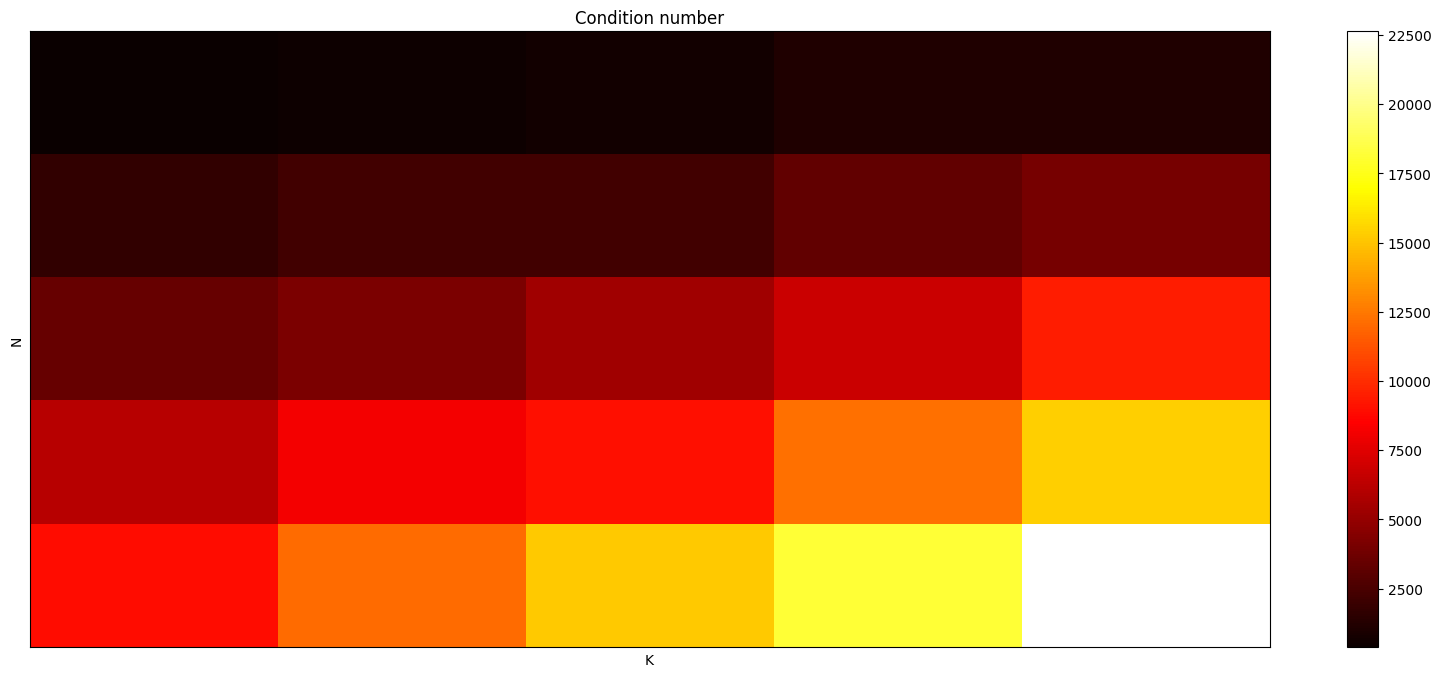

In [20]:
# A = generate_matrix(4, 4)

k_numbers = [1/10, 2/10, 3/10, 4/10, 5/10]
# n_numbers = [5, 10, 15, 20, 25]
n_numbers = [10, 20, 30, 40, 50]

cond_number_cmap = np.zeros((5, 5))

for n_i, n in enumerate(n_numbers):
  for k_i, k in enumerate(k_numbers):
    cond_number = 0
    for i in range(5):
      A = generate_matrix(k, n)
      cond_number += np.linalg.cond(A)
    cond_number_cmap[n_i][k_i] = cond_number / 5



fig, ax = plt.subplots(figsize=(20, 8))

im = ax.imshow(cond_number_cmap, cmap='hot')

ax.set_xticks(np.arange(cond_number_cmap.shape[1]))
ax.set_yticks(np.arange(cond_number_cmap.shape[0]))
im.set_extent([min(k_numbers), max(k_numbers), min(n_numbers), max(n_numbers)])
ax.set_aspect("auto")
# ax.set_xticklabels(np.arange(cond_number_cmap.shape[1])+1)
# ax.set_yticklabels(np.arange(cond_number_cmap.shape[0])+1)
ax.set_yticklabels(n_numbers)
ax.set_xlabel('K')
ax.set_ylabel('N')
ax.set_title('Condition number')

cbar = ax.figure.colorbar(im, ax=ax)

plt.show()

### Оценим зависимость точности полученного решения в зависимости от параметра k

#### a) Для метода Гаусса

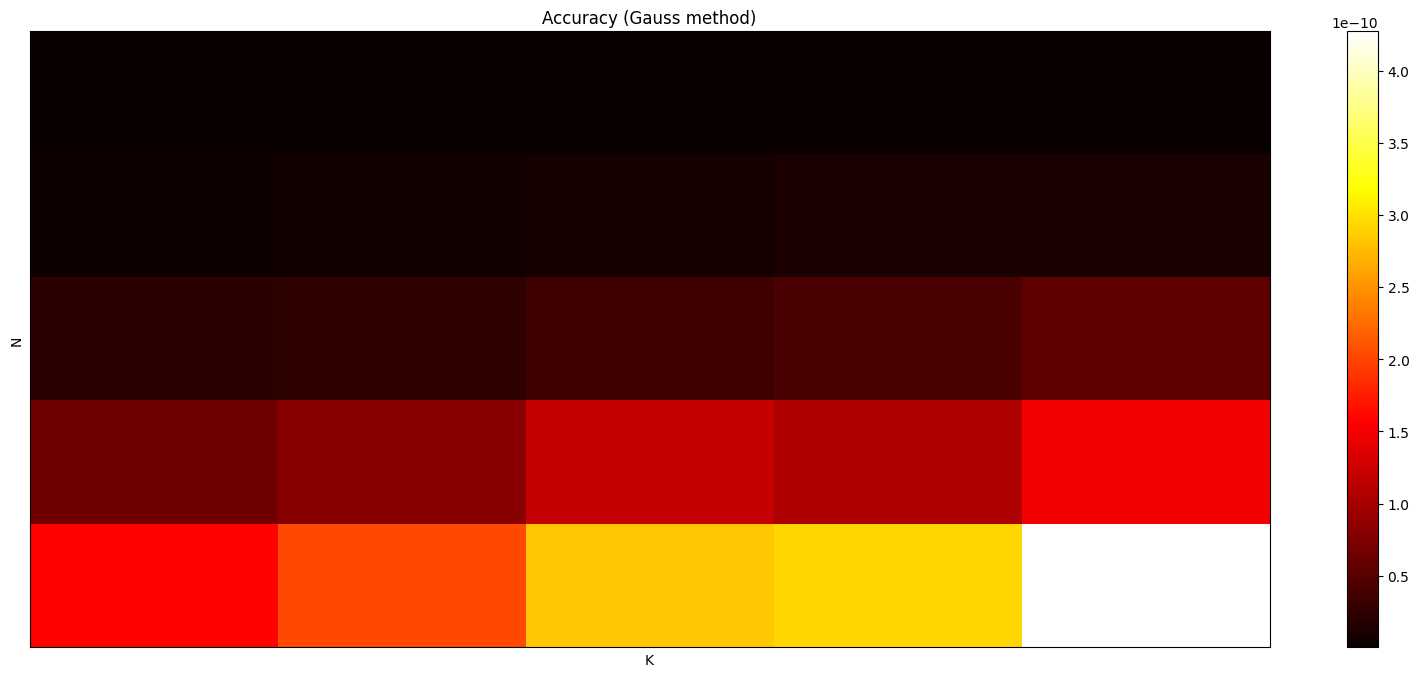

In [21]:
avg_accuracy_cmap = np.zeros((5, 5))

for n_i, n in enumerate(n_numbers):
  for k_i, k in enumerate(k_numbers):
    accuracy = 0
    for i in range(5):
      A = generate_matrix(k, n)
      v = generate_vector(n)
      x = gauss_method(A, v)

      accuracy += np.linalg.norm(A.dot(x) - v)
    avg_accuracy_cmap[n_i][k_i] = accuracy / 5

fig, ax = plt.subplots(figsize=(20, 8))

im = ax.imshow(avg_accuracy_cmap, cmap='hot')

ax.set_xticks(np.arange(avg_accuracy_cmap.shape[1]))
ax.set_yticks(np.arange(avg_accuracy_cmap.shape[0]))
im.set_extent([min(k_numbers), max(k_numbers), min(n_numbers), max(n_numbers)])
ax.set_aspect("auto")
ax.set_yticklabels(n_numbers)
ax.set_xlabel('K')
ax.set_ylabel('N')
ax.set_title('Accuracy (Gauss method)')

cbar = ax.figure.colorbar(im, ax=ax)

plt.show()

#### б) Для алгоритма LU-разложения

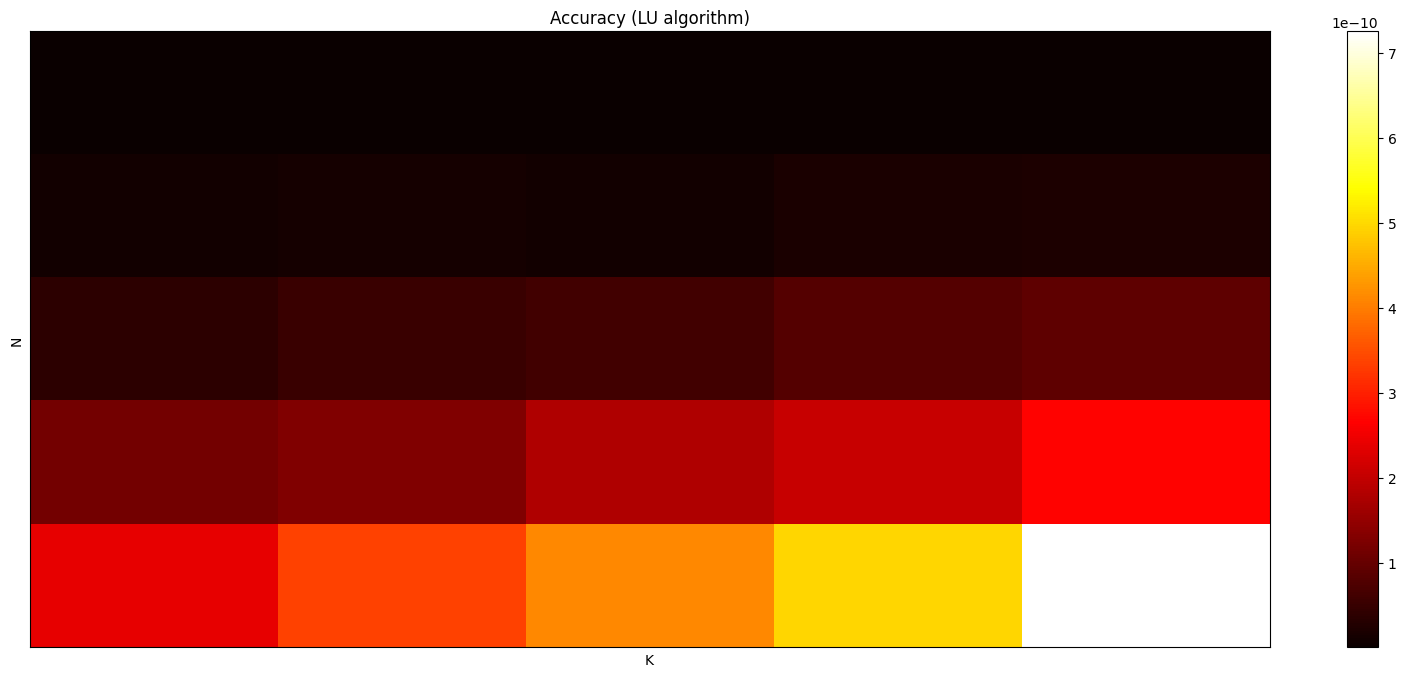

In [22]:
avg_accuracy_cmap = np.zeros((5, 5))

for n_i, n in enumerate(n_numbers):
  for k_i, k in enumerate(k_numbers):
    accuracy = 0
    for i in range(5):
      A = generate_matrix(k, n)
      v = generate_vector(n)
      x = LU_method(A, v)

      accuracy += np.linalg.norm(A.dot(x) - v)
    avg_accuracy_cmap[n_i][k_i] = accuracy / 5

fig, ax = plt.subplots(figsize=(20, 8))

im = ax.imshow(avg_accuracy_cmap, cmap='hot')

ax.set_xticks(np.arange(avg_accuracy_cmap.shape[1]))
ax.set_yticks(np.arange(avg_accuracy_cmap.shape[0]))
im.set_extent([min(k_numbers), max(k_numbers), min(n_numbers), max(n_numbers)])
ax.set_aspect("auto")
ax.set_yticklabels(n_numbers)
ax.set_xlabel('K')
ax.set_ylabel('N')
ax.set_title('Accuracy (LU algorithm)')

cbar = ax.figure.colorbar(im, ax=ax)

plt.show()

#### в) Для метода Якоби

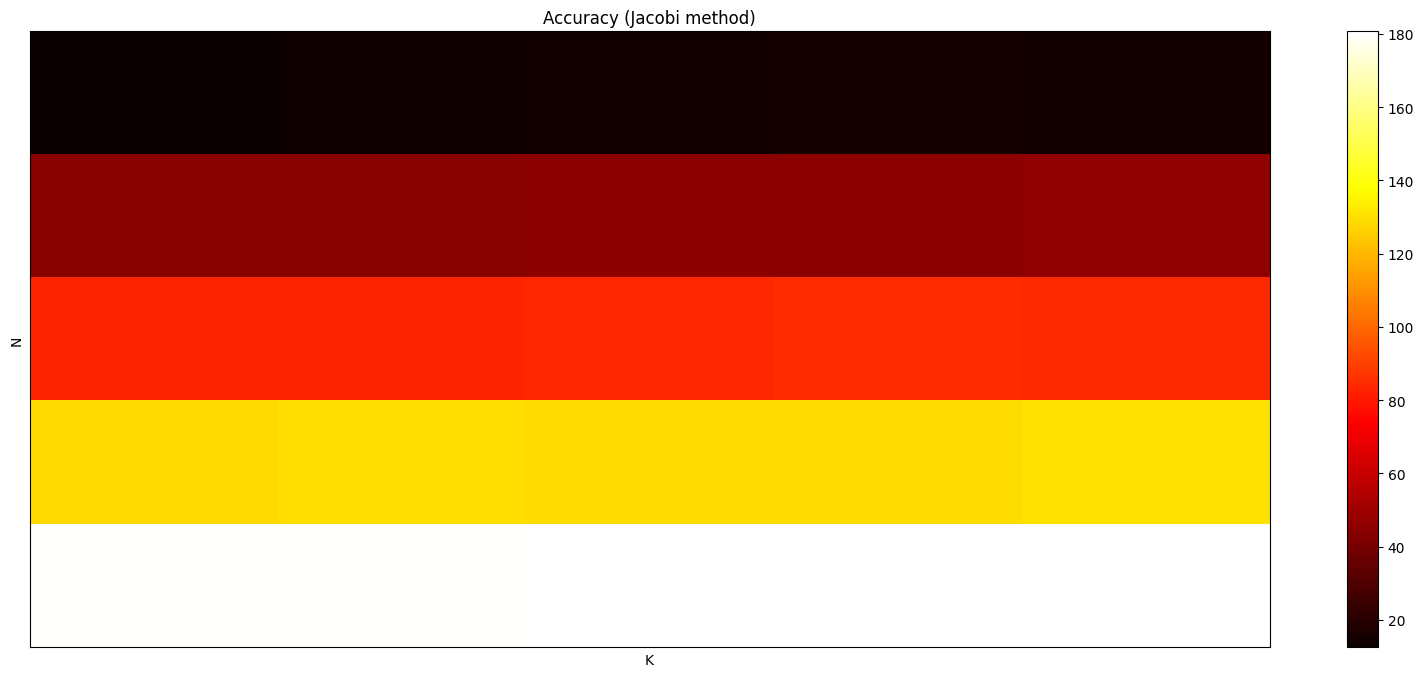

In [23]:
avg_accuracy_cmap = np.zeros((5, 5))

for n_i, n in enumerate(n_numbers):
  for k_i, k in enumerate(k_numbers):
    accuracy = 0
    for i in range(5):
      A = generate_matrix(k, n)
      v = generate_vector(n)
      x = jacobi_method(A, v)

      accuracy += np.linalg.norm(A.dot(x) - v)
    avg_accuracy_cmap[n_i][k_i] = accuracy / 5

fig, ax = plt.subplots(figsize=(20, 8))

im = ax.imshow(avg_accuracy_cmap, cmap='hot')

ax.set_xticks(np.arange(avg_accuracy_cmap.shape[1]))
ax.set_yticks(np.arange(avg_accuracy_cmap.shape[0]))
im.set_extent([min(k_numbers), max(k_numbers), min(n_numbers), max(n_numbers)])
ax.set_aspect("auto")
ax.set_yticklabels(n_numbers)
ax.set_xlabel('K')
ax.set_ylabel('N')
ax.set_title('Accuracy (Jacobi method)')

cbar = ax.figure.colorbar(im, ax=ax)

plt.show()

### Оценим зависимость числа обусловленности от параметра n для матриц Гилберта

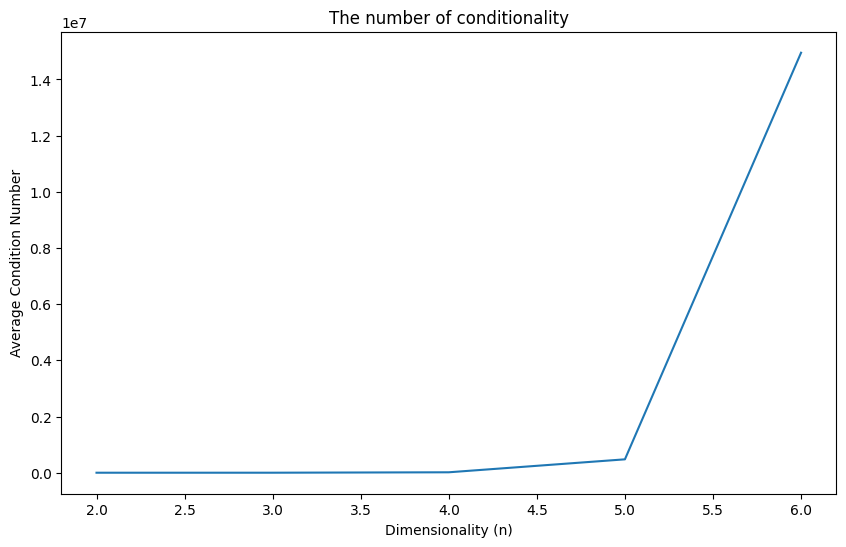

In [24]:
n_values = [2, 3, 4, 5, 6]

num_conditional = np.zeros((len(n_values)))

for n_idx, n in enumerate(n_values):
    A = generate_hilbert_matrix(n)
    cond = np.linalg.cond(A)
    num_conditional[n_idx] = cond

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_values, num_conditional)
ax.set_xlabel('Dimensionality (n)')
ax.set_ylabel('Average Condition Number')
ax.set_title('The number of conditionality')
plt.show()

### Оценим зависимость точности вычислений от параметра n для матриц Гилберта

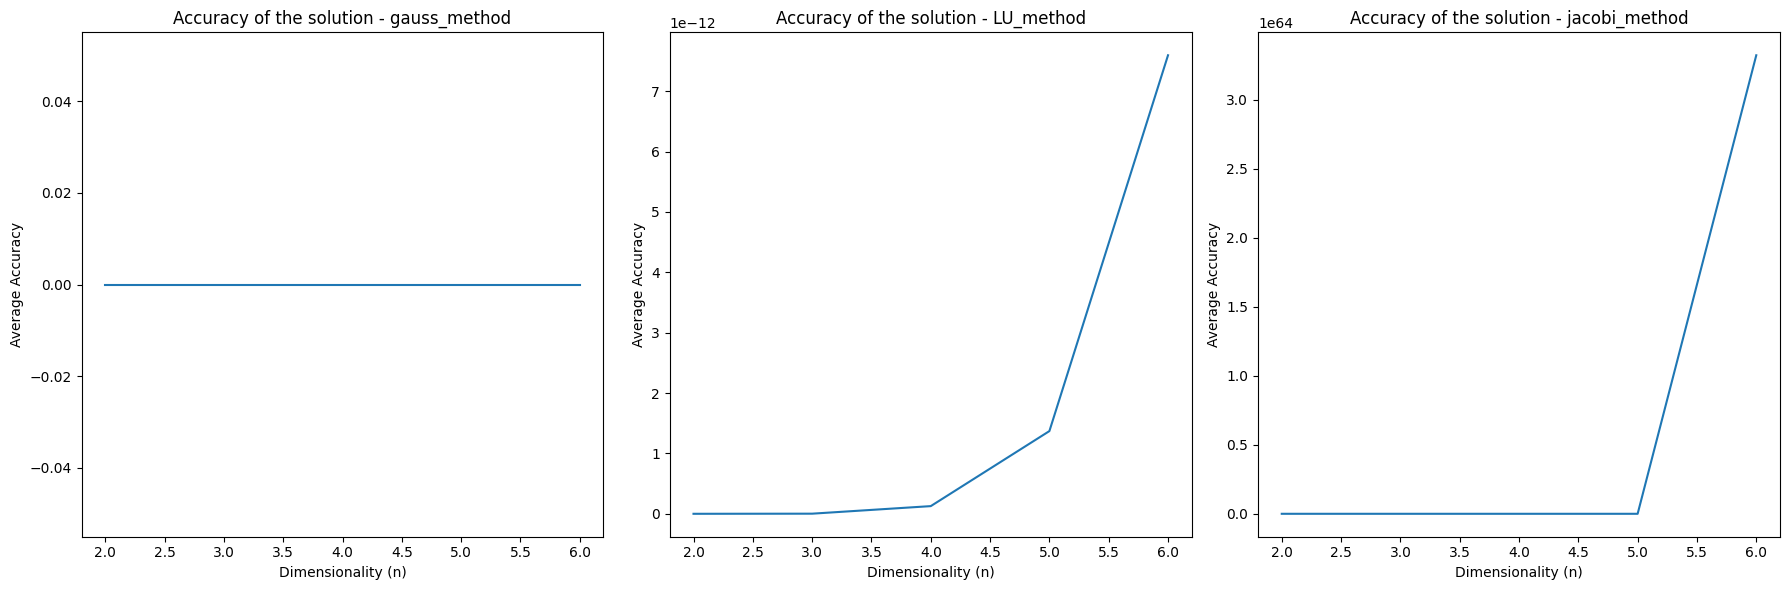

In [25]:
n_values = [2, 3, 4, 5, 6]

methods = ['gauss_method', 'LU_method', 'jacobi_method']
num_accuracy = np.zeros((len(methods), len(n_values)))

for method_idx, method in enumerate(methods):
    for n_idx, n in enumerate(n_values):
        A = generate_hilbert_matrix(n)
        b = generate_vector(n)
        x = 0
        if method == 'gauss_method':
            x = gauss_method(A, b)
        elif method == 'LU_method':
            x = LU_method(A, b)
        elif method == 'jacobi_method':
            x = jacobi_method(A, b)

        total_accuracy = np.linalg.norm(A.dot(x) - b)

        num_accuracy[method_idx, n_idx] = total_accuracy

fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(18, 6))

for method_idx, method in enumerate(methods):
    ax = axes[method_idx]
    ax.plot(n_values, num_accuracy[method_idx])
    ax.set_xlabel('Dimensionality (n)')
    ax.set_ylabel('Average Accuracy')
    ax.set_title('Accuracy of the solution - {}'.format(method))

plt.tight_layout()
plt.show()

### Сравнение прямых и итерационного метода по эффективности методов в зависимости от парметра n матрицы, удовлетворяющей условию строгой диагональной доминированности

In [ ]:
def measure_time(method, A, b):
    start_time = time.time()
    x = method(A, b)
    end_time = time.time()
    return x, end_time - start_time

matrix_sizes = [10, 20, 50, 100, 1000]

direct1_times = []
direct2_times = []
iterative_times = []

for size in matrix_sizes:
    A = generate_matrix(0.001, size)
    b = generate_vector(size)

    _, direct1_time = measure_time(gauss_method, A, b)
    direct1_times.append(direct1_time)

    _, direct2_time = measure_time(LU_method, A, b)
    direct2_times.append(direct2_time)

    _, iterative_time = measure_time(jacobi_method, A, b)
    iterative_times.append(iterative_time)


plt.plot(matrix_sizes, direct1_times, label='gauss_method')
plt.plot(matrix_sizes, direct2_times, label='LU_method')
plt.plot(matrix_sizes, iterative_times, label='jacobi_method')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Direct and Iterative Methods')
plt.legend()
plt.grid(True)
plt.show()

### Сравнение прямых и итерационного метода по эффективности методов в зависимости от парметра n

In [ ]:
def generate_random_matrix(n):
    return np.random.rand(n, n)

matrix_sizes = [10, 20, 50, 100, 1000]

direct1_times = []
direct2_times = []
iterative_times = []

for size in matrix_sizes:
    A = generate_random_matrix(size)
    b = np.random.rand(size)

    _, direct1_time = measure_time(gauss_method, A, b)
    direct1_times.append(direct1_time)

    _, direct2_time = measure_time(LU_method, A, b)
    direct2_times.append(direct2_time)

    _, iterative_time = measure_time(jacobi_method, A, b)
    iterative_times.append(iterative_time)


plt.plot(matrix_sizes, direct1_times, label='gauss_method')
plt.plot(matrix_sizes, direct2_times, label='LU_method')
plt.plot(matrix_sizes, iterative_times, label='jacobi_method')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Direct and Iterative Methods')
plt.legend()
plt.grid(True)
plt.show()